Do
problems 1 through 5 from Newton and Quasi Newton Method lab.

# Q 1

In [118]:
import numpy as np
import scipy
from scipy import linalg as la
import sympy as sy
from matplotlib import pyplot as plt
from scipy import sparse
from scipy import optimize as opt
import time
from numba import jit
from autograd import grad, jacobian

# Newton method to find roots of equations

In [61]:
def NM(derf1,derf2,xstart,maxiter, tol):
    xold=xstart
    for j in range(maxiter):
        #print(derf2(xold))
        #print(derf1(xold))
        inv=la.solve(derf2(xold),derf1(xold).T)
        xnew=xold-inv
        #xnew=xold-inv@derf1(xold).T
        #xnew=xold-la.inv(derf2(xold))@derf1(xold).T
        diff=la.norm(xnew-xold)
        if diff<tol: 
            break
        else:
                xold=xnew
    return xnew,diff,j

In [39]:
f = opt.rosen # The Rosenbrock function.
derf = opt.rosen_der # The first derivative.
derf2 = opt.rosen_hess
maxiter=100
tol=0.00001
xstart=np.array([-2,2])
NM(derf,derf2,xstart,maxiter, tol)

1
1.9700890179102142
2
12.158875684537662
3
8.758033972168008
4
0.07207843152287179
5
0.0010961703892304296
6
9.512174680414227e-10
converged!
5


(array([1., 1.]), 9.512174680414227e-10)

# Q2: BFGS
Newton method requires an inverse which may take long - BFGS avoids this! (numerically approximates the inverse of the hessian)

In [56]:
@jit
def bfgs(derf1,xstart,maxiter, tol):
    xold=xstart
    xnew=np.ones_like(xstart)
    Aold=np.identity(2)
    for j in range(maxiter):
        xnew=xold-Aold@derf1(xold).T
        s=np.array([xnew-xold]).T
        y=np.array([derf1(xnew)-derf1(xold)]).T
        num1=(s.T@y+y.T@(Aold)@y)*(s@s.T)
        den1=(s.T@y)**2
        num2=(Aold)@y@s.T+s@y.T@(Aold)
        den2=s.T@y
        #Anew=Aold+(y@y.T)/(y.T@s)-(Aold@s@s.T@Aold)/(s.T@Aold@s)
        Anew=Aold+num1/den1-num2/den2
        #xnew=xold-la.inv(derf2(xold))@derf1(xold).T
        #print(derf1(xold))
        diff=la.norm(derf1(xold))
        if diff<tol: 
            break
        else:
                xold=xnew
                Aold=Anew
    return xnew,diff,j

In [57]:
f = opt.rosen # The Rosenbrock function.
derf = opt.rosen_der # The first derivative.
derf2 = opt.rosen_hess
maxiter=500
tol=0.0001
xstart=np.array([-2,2])
xnew,diff,it=bfgs(derf,xstart,maxiter, tol)
print(diff, "iterations:",it)

1.4169489184425296e-07 iterations: 160


# Q3

C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\utabo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from 

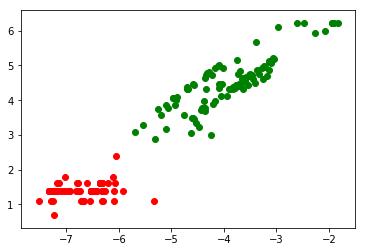

In [84]:
for n in range(100):
    #Sample random guess:
    x1=np.random.uniform(-3,3)
    x2=np.random.uniform(-3,3)
    x0=np.array([x1,x2])
    f = opt.rosen # The Rosenbrock function.
    derf = opt.rosen_der # The first derivative.
    derf2 = opt.rosen_hess
    maxiter=500
    tol=0.0001
    start=time.clock() 
    xnew,diff,itbfgs=bfgs(derf,x0,maxiter, tol)
    durationBFGS=time.clock() -start
    start=time.clock() 
    xnew,diff,itnm=NM(derf,derf2,x0,maxiter, tol)
    durationNM=time.clock() -start
    start=time.clock() 
    x=opt.fmin_bfgs(f, x0, fprime=derf,epsilon=tol, maxiter=maxiter,disp=0)
    durationSP=time.clock() -start
    #print("NM time:", durationNM, " BFGStime:", durationBFGS, " BFGSscipy time:", durationSP)
    plt.scatter(np.log(durationNM), np.log(itnm), label="NM", c="red")
    plt.scatter(np.log(durationBFGS), np.log(itbfgs), label="BFGS", c="green")
    #plt.scatter(durationSP, x.func_calls, label="BFGS", c="green")

### Gauss Newton Method: 
Solve least squares problem


In [222]:
def gauss_newton(model,jac, residual, x0, maxiter=100, tol=1e-3):
    xold=x0
    for j in range(maxiter):
        J=jac(xold)
        r=residual(xold)
        derf1=J.T@r
        xnew=xold-la.inv(J.T@J)@J.T@r
        #diff=la.norm(derf1)
        diff=la.norm(xold-xnew)
        if diff<tol: 
            break
        else:
                xold=xnew
    return xnew,j

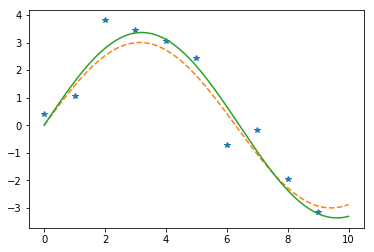

In [223]:
# Generate random data for t = 0, 1, ..., 10.
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10) # Perturbed data.
# Define the model function and the residual (based on the data).
model = lambda x, t: x[0]*np.sin(x[1]*t) # phi(x,t)
residual = lambda x: model(x, T) - y # r(x) = phi(x,t) - y
# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))
x0 = np.array([2.5,.6])
x,  niters = gauss_newton(model,jac, residual, x0, maxiter=10, tol=1e-3)
# Plot the fitted model with the observed data and the data-generating curve.
dom = np.linspace(0, 10, 200)
plt.plot(T, y, '*') # Observed data.
plt.plot(dom, 3*np.sin(.5*dom), '--') # Data-generating curve.
plt.plot(dom, model(x, dom)) # Fitted model.
plt.show()

# Q 5: Non-linear least squares

In [224]:
popdata=np.load("population.npy")

In [225]:
import autograd.numpy as np

In [246]:
def gauss_newton(model,jac, residual, x0, maxiter=100, tol=1e-3):
    xold=x0
    for j in range(maxiter):
        J=jac(xold)
        r=residual(xold)
        xnew=xold-la.inv(J.T@J)@J.T@r
        derf1=J.T@r
        diff=la.norm(derf1)
        #diff=la.norm(xold-xnew)
        if diff<tol: 
            break
        else:
                xold=xnew
    return xnew,j

[ 6.05051906  7.27631038  8.75043813 10.52321348 12.65514026 15.21897997
 18.30223502 22.0101352  26.46922908 31.83170306 38.28057542 46.03594258
 55.36249092 66.57853036 80.06685812 96.28782332]
9


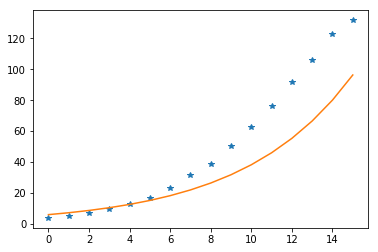

In [271]:
y=np.array(popdata[:,1])
T=np.array(popdata[:,0])
model = lambda x: x[0]*np.exp(x[1]*(T+x[2])) # phi(x,t)
residual = lambda x: model(x) - y # r(x) = phi(x,t) - y
jac = jacobian(model)
x0 = np.array([1.5,.4,1])
x,  niters = gauss_newton(model,jac, residual, x0, maxiter=10, tol=1e-5)
print(model(x))
print( niters)
# Plot the fitted model with the observed data and the data-generating curve.
dom = np.arange(16)
plt.plot(T, y, '*') # Observed data.
plt.plot(dom, model(x)) # Fitted model.
plt.show()

[  3.74503545   5.12670054   6.99839974   9.51723178  12.87696126
  17.30560724  23.05308121  30.36328278  39.42640967  50.31325998
  62.90517753  76.84728397  91.55779598 106.31027342 120.37005398
 133.13392806]
8


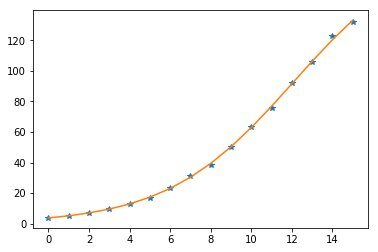

In [272]:
y=np.array(popdata[:,1])
T=np.array(popdata[:,0])
model = lambda x: x[0]/(1+np.exp(-x[1]*(T+x[2]))) # phi(x,t)
residual = lambda x: model(x) - y # r(x) = phi(x,t) - y
jac = jacobian(model)
x0 = np.array([150,.4,-15])
x,  niters = gauss_newton(model,jac, residual, x0, maxiter=10, tol=1e-3)
print(model(x))
print( niters)
# Plot the fitted model with the observed data and the data-generating curve.
dom = np.arange(16)
plt.plot(T, y, '*') # Observed data.
plt.plot(dom, model(x)) # Fitted model.
plt.show()